<a href="https://colab.research.google.com/github/johan92lee/z2m-tf-tutorials/blob/main/03_intro_to_computer_vision_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Convolutional Nueral Networks and Computer Vision with TensorFlow

Computer vision is the practive if writing algorithms which can discover patterns in visual data. Such as the camera of self-driving car recognizing the car in front

## Get the data

The  images we're working with are from the Food10 dataset from kaggle

However we've modified it to only use two classes (pizza and steak) using the image data modification notebook

**Note:** We start with a smaller dataset so we can experiment what works and what doesn't before scaling up.

In [1]:
import zipfile 

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# Unzip the downlaoded file
zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

--2022-04-19 05:55:29--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.133.128, 74.125.140.128, 108.177.15.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.133.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M  45.0MB/s    in 2.3s    

2022-04-19 05:55:33 (45.0 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



## Inspect the data 

A very crucial setp at teh beginning of any machien learning projhect is becoming one with the data.

And for ac computer vision project, this usually means visuallizing many samples of your data

In [2]:
!ls pizza_steak

test  train


In [3]:
!ls pizza_steak/train/

pizza  steak


In [4]:
!ls pizza_steak/train/steak

1000205.jpg  1647351.jpg  2238681.jpg  2824680.jpg  3375959.jpg  417368.jpg
100135.jpg   1650002.jpg  2238802.jpg  2825100.jpg  3381560.jpg  4176.jpg
101312.jpg   165639.jpg   2254705.jpg  2826987.jpg  3382936.jpg  42125.jpg
1021458.jpg  1658186.jpg  225990.jpg   2832499.jpg  3386119.jpg  421476.jpg
1032846.jpg  1658443.jpg  2260231.jpg  2832960.jpg  3388717.jpg  421561.jpg
10380.jpg    165964.jpg   2268692.jpg  285045.jpg   3389138.jpg  438871.jpg
1049459.jpg  167069.jpg   2271133.jpg  285147.jpg   3393547.jpg  43924.jpg
1053665.jpg  1675632.jpg  227576.jpg   2855315.jpg  3393688.jpg  440188.jpg
1068516.jpg  1678108.jpg  2283057.jpg  2856066.jpg  3396589.jpg  442757.jpg
1068975.jpg  168006.jpg   2286639.jpg  2859933.jpg  339891.jpg	 443210.jpg
1081258.jpg  1682496.jpg  2287136.jpg  286219.jpg   3417789.jpg  444064.jpg
1090122.jpg  1684438.jpg  2291292.jpg  2862562.jpg  3425047.jpg  444709.jpg
1093966.jpg  168775.jpg   229323.jpg   2865730.jpg  3434983.jpg  447557.jpg
1098844.jpg  1697

In [5]:
import os 

# Walkthrough pizza_steak directory and list number of files
for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in 'pizza_steak'.
There are 2 directories and 0 images in 'pizza_steak/train'.
There are 0 directories and 750 images in 'pizza_steak/train/steak'.
There are 0 directories and 750 images in 'pizza_steak/train/pizza'.
There are 2 directories and 0 images in 'pizza_steak/test'.
There are 0 directories and 250 images in 'pizza_steak/test/steak'.
There are 0 directories and 250 images in 'pizza_steak/test/pizza'.


To visualize our images, first let's get the class nam,e programmatically

In [6]:
# Get the classnames programmatically
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob('*')])) # Creata a list of class_names from the subdirectories
print(class_names)

['pizza' 'steak']


In [7]:
# Let's visualize our images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Setup the target directory (we'll view images from here)
  target_folder = target_dir + target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)
  print(random_image)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")

  print(f"Image shape: {img.shape}") # Show the shape of the image

  return img


['1705773.jpg']
Image shape: (512, 512, 3)


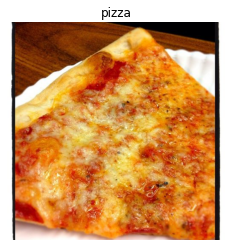

In [8]:
# View a random image form the training dataset
img = view_random_image(target_dir="pizza_steak/train/",
                        target_class="pizza")

In [9]:
 import tensorflow as tf
 tf.constant(img)

<tf.Tensor: shape=(512, 512, 3), dtype=uint8, numpy=
array([[[168, 158, 157],
        [176, 162, 159],
        [176, 157, 150],
        ...,
        [255, 255, 251],
        [255, 255, 251],
        [255, 255, 251]],

       [[174, 164, 163],
        [178, 164, 161],
        [175, 156, 149],
        ...,
        [255, 255, 251],
        [255, 255, 251],
        [255, 255, 251]],

       [[180, 170, 169],
        [179, 165, 162],
        [174, 155, 148],
        ...,
        [255, 255, 251],
        [255, 255, 251],
        [255, 255, 251]],

       ...,

       [[137, 132, 113],
        [145, 140, 121],
        [150, 145, 126],
        ...,
        [255, 255, 251],
        [255, 255, 251],
        [255, 255, 251]],

       [[141, 134, 116],
        [143, 136, 118],
        [147, 140, 122],
        ...,
        [255, 255, 251],
        [255, 255, 251],
        [255, 255, 251]],

       [[142, 135, 117],
        [138, 131, 113],
        [141, 134, 116],
        ...,
        [255, 255, 25

In [10]:
# Get all the pixel value between 0 and 1
img/225.

array([[[0.74666667, 0.70222222, 0.69777778],
        [0.78222222, 0.72      , 0.70666667],
        [0.78222222, 0.69777778, 0.66666667],
        ...,
        [1.13333333, 1.13333333, 1.11555556],
        [1.13333333, 1.13333333, 1.11555556],
        [1.13333333, 1.13333333, 1.11555556]],

       [[0.77333333, 0.72888889, 0.72444444],
        [0.79111111, 0.72888889, 0.71555556],
        [0.77777778, 0.69333333, 0.66222222],
        ...,
        [1.13333333, 1.13333333, 1.11555556],
        [1.13333333, 1.13333333, 1.11555556],
        [1.13333333, 1.13333333, 1.11555556]],

       [[0.8       , 0.75555556, 0.75111111],
        [0.79555556, 0.73333333, 0.72      ],
        [0.77333333, 0.68888889, 0.65777778],
        ...,
        [1.13333333, 1.13333333, 1.11555556],
        [1.13333333, 1.13333333, 1.11555556],
        [1.13333333, 1.13333333, 1.11555556]],

       ...,

       [[0.60888889, 0.58666667, 0.50222222],
        [0.64444444, 0.62222222, 0.53777778],
        [0.66666667, 0

## An end to end example
Let's build a convolutional neural network to find patterns in our images, more specifically we need a way to:

* Load image
* Preprocess
* Build CNN to find patterns in our images
* Complie our CNN
* Fit the CNN to our training data

In [27]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set the set
tf.random.set_seed(42)

# Preprocess data (get all of the pixel values between 0-1, also called scaling/normalization)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Setup paths to our data directories
train_dir = "/content/pizza_steak/train"
test_dir = "pizza_steak/test"

# IMport data from directoreis and turn it into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               batch_size= 32,
                                               target_size=(224,224),
                                               class_mode="binary",
                                               seed=42)

valid_data = valid_datagen.flow_from_directory(directory= test_dir,
                                               batch_size=32,
                                               target_size=(224,224),
                                               class_mode="binary",
                                               seed=42)

# Build a CNN model (same as the Tiny VGG on the CNN explainer website)
model_1 = tf.keras.models.Sequential([tf.keras.layers.Conv2D(filters=10,
                                                             kernel_size=3,
                                                             activation="relu",
                                                             input_shape=(224,224,3)),
                                      tf.keras.layers.Conv2D(10, 3, activation="relu"),
                                      tf.keras.layers.MaxPool2D(pool_size=2,
                                                                padding="valid"),
                                      tf.keras.layers.Conv2D(10, 3, activation="relu"),
                                      tf.keras.layers.Conv2D(10, 3, activation="relu"),
                                      tf.keras.layers.MaxPool2D(2),
                                      tf.keras.layers.Flatten(),
                                      tf.keras.layers.Dense(1, activation="sigmoid")
                                      ])

# Compile our CNN
model_1.compile(loss="binary_crossentropy",
               optimizer=tf.keras.optimizers.Adam(),
               metrics= ["accuracy"])

# Fit the mode
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data= valid_data,
                        validation_steps=len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 13s 250ms/step - loss: 0.5737 - accuracy: 0.6933 - val_loss: 0.4021 - val_accuracy: 0.8300
Epoch 2/5
47/47 [==============================] - 11s 233ms/step - loss: 0.4167 - accuracy: 0.8107 - val_loss: 0.3276 - val_accuracy: 0.8500
Epoch 3/5
47/47 [==============================] - 11s 234ms/step - loss: 0.3923 - accuracy: 0.8267 - val_loss: 0.3465 - val_accuracy: 0.8540
Epoch 4/5
47/47 [==============================] - 14s 294ms/step - loss: 0.3768 - accuracy: 0.8300 - val_loss: 0.3292 - val_accuracy: 0.8540
Epoch 5/5
47/47 [==============================] - 11s 242ms/step - loss: 0.3219 - accuracy: 0.8693 - val_loss: 0.3511 - val_accuracy: 0.8380


In [12]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

## Using the same model as before

Lets replicate the model we've built in the previous section to see if it works with our image data.


In [13]:
# Set random seed
tf.random.set_seed(42)

# Create a model to replicate the TensorFlow Playground model
model_2 = tf.keras.Sequential([tf.keras.layers.Flatten(input_shape=(224,224,3)),
                               tf.keras.layers.Dense(4, activation="relu"),
                               tf.keras.layers.Dense(4, activation="relu"),
                               tf.keras.layers.Dense(1, activation="sigmoid")])

# Compile the model
model_2.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_2 = model_2.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 10s 212ms/step - loss: 2.0611 - accuracy: 0.4933 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 10s 205ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 10s 205ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 10s 203ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 10s 205ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000


In [14]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 150528)            0         
                                                                 
 dense_1 (Dense)             (None, 4)                 602116    
                                                                 
 dense_2 (Dense)             (None, 4)                 20        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 602,141
Trainable params: 602,141
Non-trainable params: 0
_________________________________________________________________


In [15]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_3 = tf.keras.Sequential([tf.keras.layers.Flatten(input_shape=(224,224,3)),
                               tf.keras.layers.Dense(100, activation="relu"),
                               tf.keras.layers.Dense(100, activation="relu"),
                               tf.keras.layers.Dense(100, activation="relu"),
                               tf.keras.layers.Dense(1, activation="sigmoid")])

# Compile the model
model_3.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_3 = model_3.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 11s 214ms/step - loss: 2.8198 - accuracy: 0.6587 - val_loss: 0.8107 - val_accuracy: 0.6320
Epoch 2/5
47/47 [==============================] - 10s 204ms/step - loss: 1.2126 - accuracy: 0.6653 - val_loss: 0.8356 - val_accuracy: 0.7360
Epoch 3/5
47/47 [==============================] - 10s 206ms/step - loss: 0.7900 - accuracy: 0.7080 - val_loss: 0.6231 - val_accuracy: 0.7280
Epoch 4/5
47/47 [==============================] - 10s 205ms/step - loss: 0.5161 - accuracy: 0.7733 - val_loss: 0.5873 - val_accuracy: 0.7540
Epoch 5/5
47/47 [==============================] - 10s 205ms/step - loss: 0.6906 - accuracy: 0.7127 - val_loss: 0.5122 - val_accuracy: 0.7720


In [16]:
train_data

In [17]:
len(train_data)

47

## Binary Classification: Let's break it down

1. Become one with the data (visualize, visualize, visualize)
2. Preprocess the data
3. Create a model (start with a baseline)
4. Fit the model
5. Evaluate the model
6. Tune the model
7. Repeat until statisfied (experiment, experiment, experiment)

### 1 . Become one with the data

In [21]:
import tensorflow as tf

['1632774.jpg']
Image shape: (512, 512, 3)
['1287004.jpg']
Image shape: (512, 512, 3)


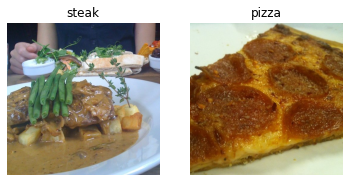

In [9]:
# Visualize the data
plt.figure()
plt.subplot(1, 2, 1)
steak_img = view_random_image("pizza_steak/train/","steak")
plt.subplot(1, 2, 2)
pizza_img = view_random_image("pizza_steak/train/","pizza")

### 2. Preprocess the data (prepare it for a model)

In [10]:
# Define directory dataset paths
train_dir = "pizza_steak/train"
test_dir = "pizza_steak/test"

Our next step is to turn our data into **batches**

A batch is a small subset data. Rather than look at all images at one time a model might only look at 32 at a time.

It does this for a couple of resons:
1. Large number of images might not fit into the memory of your processor (GPU)
2. Trying the learn the patterns in large number in one hear could results in the model not being able to learn very well.

Why 32?

In [11]:
# Create train and test data generator and rescale the data
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

In [12]:
# Load in our image data from dfirectoreis and turn them into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                              target_size=(224,224),
                                              class_mode="binary",
                                              batch_size=32)
test_data = test_datagen.flow_from_directory(directory=test_dir,
                                             target_size=(224,224),
                                             class_mode="binary",
                                             batch_size=32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [13]:
# Get a sample of a train data batch
images, labels = train_data.next() #get ateh "next" batch of images/labels in train_data
len(images), len(labels)

(32, 32)

In [14]:
# How many batches are there?
len(train_data), 1500/32

(47, 46.875)

In [ ]:
# Get the first 2 images
images[:2], images[0].shape

In [16]:
images[7].shape

(224, 224, 3)

In [17]:
# View the first match of labels
labels

array([1., 1., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 1., 1., 1., 0., 1.,
       0., 1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 1.],
      dtype=float32)

### 3. Create a CNN model (start with a baseline)

A baseline is a relativelty simple model or existing results that you setup when beginning a machine learning experiment and then as you keep experimenting you try to beat the baseline

**Note:** In deep learning there is almost an infinite amount of rchitectures you could create. So one of the best ways to get started is to start with someting simple and see if it works on your data and then introduce complexity as required 

In [18]:
# Make the creating of our modle a litel easier
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential


In [19]:
# Create the model (Baseline)
model_4 = Sequential([Conv2D(filters=10,
                             kernel_size=(3,3),
                             strides=1,
                             padding="valid",
                             activation="relu",
                             input_shape=(224,224,3)),
                      Conv2D(10, 3, activation="relu"),
                      Conv2D(10, 3, activation="relu"),
                      Flatten(),
                      Dense(1, activation="sigmoid")])



In [22]:
# Compile the model
model_4.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [25]:
# Get a summary of our model
model_4.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 conv2d_2 (Conv2D)           (None, 218, 218, 10)      910       
                                                                 
 flatten (Flatten)           (None, 475240)            0         
                                                                 
 dense (Dense)               (None, 1)                 475241    
                                                                 
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


### 4. Fit the model

In [24]:
# Fit the model

history_4 = model_4.fit(train_data, # is a combination of labels and sample data
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 24s 272ms/step - loss: 0.6247 - accuracy: 0.7100 - val_loss: 0.4477 - val_accuracy: 0.8000
Epoch 2/5
47/47 [==============================] - 11s 244ms/step - loss: 0.4122 - accuracy: 0.8180 - val_loss: 0.3843 - val_accuracy: 0.8400
Epoch 3/5
47/47 [==============================] - 12s 245ms/step - loss: 0.2631 - accuracy: 0.8947 - val_loss: 0.3569 - val_accuracy: 0.8340
Epoch 4/5
47/47 [==============================] - 12s 264ms/step - loss: 0.0831 - accuracy: 0.9760 - val_loss: 0.4245 - val_accuracy: 0.8160
Epoch 5/5
47/47 [==============================] - 12s 247ms/step - loss: 0.0213 - accuracy: 0.9967 - val_loss: 0.4030 - val_accuracy: 0.8240


In [28]:
len(train_data)

47

In [32]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

In [29]:
model_1.evaluate(test_data)

16/16 [==============================] - 3s 160ms/step - loss: 0.3511 - accuracy: 0.8380


[0.35106930136680603, 0.8379999995231628]

## 5. Evaluating our model

It looks like our model is learning something, let's evaluate it.

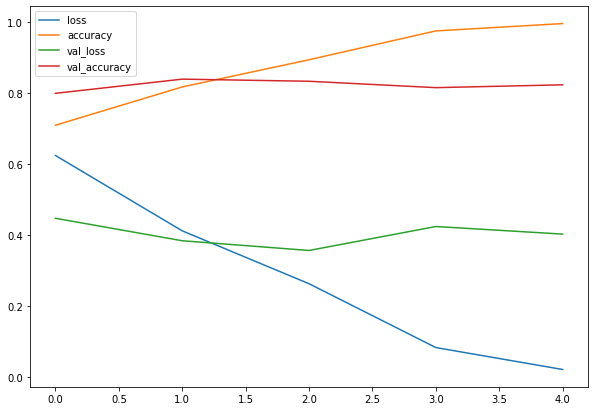

In [30]:
# Lets plot the training curve
import pandas as pd
pd.DataFrame(history_4.history).plot(figsize=(10,7));

In [34]:
# Plot the validation and trainign curves separately
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """

  loss = history.history['loss']
  val_loss = history.history["val_loss"]
  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]
  epochs = range(len(history.history["loss"])) # how many epochs did we run for

  # Plot loss
  plt.plot(epochs, loss, label="training_loss")
  plt.plot(epochs, val_loss, label="val_loss")
  plt.title("loss")
  plt.xlabel("epochs")
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label="training_accuracy")
  plt.plot(epochs, val_accuracy, label="val_accuracy")
  plt.title("accuracy")
  plt.xlabel("epochs")
  plt.legend()

**Note** : When a model's **validation_loss starts to increase**, it's likely that htem odel is **overfitting** the training dataset, This measn, it's learning the patterns in the training dataset *too well* and thus the model's ability to generalize to unseen data will be diminished.

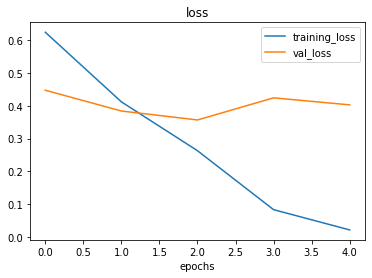

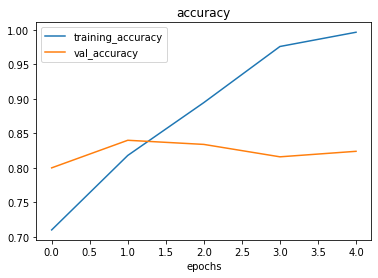

In [35]:
# Check out the loss and accuracy of model_4
plot_loss_curves(history_4)

### 6. Adjust the model parrameters

Fitting a maching learning model comes in 3 steps:
0. Create a baseline
1. Beat the baseline by overfitting a larger model
2. Reduce overfitting

Way to induce overfitting
* Increase the number of conv layers
* Increase he number of conv filters
* Add another dense layer to the output of our flattened layer

Reduce overfitting:
* Add data augmentation
* Add regularization layers (such as MaxPool2D)
* Add more data...

**Notes:** Reducing overfitting is also known as **regularization**

In [36]:
# Create the model (this is going to be our new baseline)

model_5 = Sequential([Conv2D(10,3, activation="relu", input_shape=(224,224,3)),
                      MaxPool2D(pool_size= 2),
                      Conv2D(10, 3, activation="relu"),
                      MaxPool2D(),
                      Conv2D(10, 3, activation="relu"),
                      MaxPool2D(),
                      Flatten(),
                      Dense(1, activation="sigmoid")])


In [37]:
# Compile the model
model_5.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

In [38]:
# Fit the model
history_5 = model_5.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 12s 224ms/step - loss: 0.5730 - accuracy: 0.7040 - val_loss: 0.4973 - val_accuracy: 0.7340
Epoch 2/5
47/47 [==============================] - 10s 221ms/step - loss: 0.4510 - accuracy: 0.8060 - val_loss: 0.3855 - val_accuracy: 0.8240
Epoch 3/5
47/47 [==============================] - 10s 220ms/step - loss: 0.4136 - accuracy: 0.8220 - val_loss: 0.3262 - val_accuracy: 0.8600
Epoch 4/5
47/47 [==============================] - 10s 223ms/step - loss: 0.3835 - accuracy: 0.8347 - val_loss: 0.3889 - val_accuracy: 0.8160
Epoch 5/5
47/47 [==============================] - 11s 234ms/step - loss: 0.3604 - accuracy: 0.8493 - val_loss: 0.2994 - val_accuracy: 0.8580


In [39]:
# Get a summary of our model with max pools
model_5.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 111, 111, 10)     0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 26, 26, 10)      